<a href="https://colab.research.google.com/github/dmittal1409/ENITS_DataMining_22/blob/main/Week_3/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - GroupBy

In [1]:
#get data
!git clone https://github.com/keuperj/DATA.git

Cloning into 'DATA'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 101 (delta 2), reused 14 (delta 2), pack-reused 87
Receiving objects: 100% (101/101), 146.44 MiB | 19.08 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Checking out files: 100% (69/69), done.


### Step 1. Import the necessary libraries

In [2]:
import pandas as pd 
import numpy as np

### Step 2. 
User ***Jupyter Lab*** to view ``DATA/drinks.cvs``.

### Step 3. Assign it to a variable called drinks.

In [147]:
drinks = pd.read_csv("/content/DATA/drinks.csv")


### Abstract of DATA

In [148]:
drinks.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [149]:
print(f"Names of columns:{drinks.columns}")

print(f"Number of observation:{drinks.shape}")


Names of columns:Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')
Number of observation:(193, 6)


### Finding Missing data 

In [151]:
print(drinks.isnull().sum())

print(f"percentage of null data in continet is {((23/193)*100)}%")

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
percentage of null data in continet is 11.917098445595855%


### After analysing data , I am manualing replacing the NaN value of contient by using pycountry but in that library North America was not present and All 23 countries belongs to NE(North America) so replacing it with NE

In [27]:
import pycountry_convert as pc


CN
AS


### country names of corresponding NAN(NULL) values

In [33]:
drinks_with_null_values = drinks[drinks['continent'].isna()]
print(drinks_with_null_values['country'])


5                 Antigua & Barbuda
11                          Bahamas
14                         Barbados
17                           Belize
32                           Canada
41                       Costa Rica
43                             Cuba
50                         Dominica
51               Dominican Republic
54                      El Salvador
68                          Grenada
69                        Guatemala
73                            Haiti
74                         Honduras
84                          Jamaica
109                          Mexico
122                       Nicaragua
130                          Panama
143               St. Kitts & Nevis
144                       St. Lucia
145    St. Vincent & the Grenadines
174               Trinidad & Tobago
184                             USA
Name: country, dtype: object


In [47]:
drinks['continent'] = drinks['continent'].fillna('NE')
print(drinks.isnull().sum())

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64


### Step 4. Which continent drinks the most beer on average?

In [50]:
print(f"average of each continent:{drinks.groupby('continent').beer_servings.mean()}")

con_avg_beer = drinks.groupby('continent').beer_servings.mean().idxmax()
print(f"The maximum beer consumed by : {con_avg_beer}")

average of each continent:continent
AF     61.471698
AS     37.045455
EU    193.777778
NE    145.434783
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64
The maximum beer consumed by : EU


In [55]:
import seaborn as sc
import matplotlib.pyplot as plt

In [83]:
values = (drinks.groupby('continent').beer_servings.mean())
df = values.to_frame()
df['continent'] = df.index
print(df)

           beer_servings continent
continent                         
AF             61.471698        AF
AS             37.045455        AS
EU            193.777778        EU
NE            145.434783        NE
OC             89.687500        OC
SA            175.083333        SA


In [ ]:
#@title 
#@ 

#fig = plt.figure(figsize = (10, 10))
plt.bar(df['continent'],df['beer_servings'])

plt.xlabel("Continent")
plt.ylabel("Average Beer consumed")
plt.title("continent drinks the most beer on average ")
plt.show()

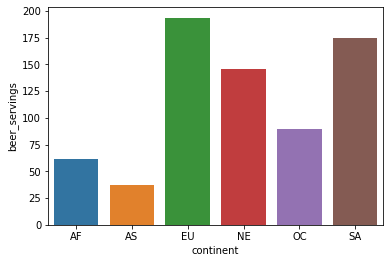

In [84]:
sc.barplot(data = df , x = df['continent'] ,y = df['beer_servings'])

### Step 5. For each continent print the statistics for wine consumption.

In [ ]:
mean = (drinks.groupby('continent').wine_servings.mean()).to_frame()
continent = mean.index
median = drinks.groupby('continent').wine_servings.median()
var = drinks.groupby('continent').wine_servings.var()
std = drinks.groupby('continent').wine_servings.std()

del mean
new_mean = drinks.groupby('continent').wine_servings.mean()


In [129]:
wine_df = pd.DataFrame({'continent':continent, 'mean':new_mean, 'median':median, 'vairance':var , 'standard deviation': std})
wine_df.head(6)

,continent,mean,median,vairance,standard deviation
continent,,,,,
AF,AF,16.264151,2.0,1509.044267,38.846419
AS,AS,9.068182,1.0,469.460359,21.667034
EU,EU,142.222222,128.0,9490.994949,97.421738
NE,NE,24.521739,11.0,798.988142,28.266378
OC,OC,35.625000,8.5,4167.450000,64.555790
SA,SA,62.416667,12.0,7853.537879,88.620189


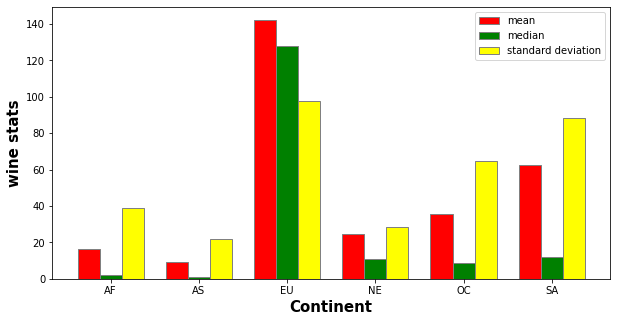

In [130]:
barwidth = 0.25
fig = plt.subplots(figsize =(10, 5))

br1 = np.arange(len(wine_df['mean']))
br2 = [x + barwidth for x in br1]
br3 = [x + barwidth for x in br2]
#br4 = [X + barwidth for X in br3]


plt.bar(br1, wine_df['mean'], color ='r', width = barwidth,
        edgecolor ='grey', label ='mean')
plt.bar(br2, wine_df['median'], color ='g', width = barwidth,
        edgecolor ='grey', label ='median')
plt.bar(br3, wine_df['standard deviation'] , color ='yellow', width = barwidth,
        edgecolor ='grey', label ='standard deviation')

plt.xlabel('Continent', fontweight ='bold', fontsize = 15)
plt.ylabel('wine stats', fontweight ='bold', fontsize = 15)
plt.xticks([r + barwidth for r in range(len(wine_df['mean']))],
        list(df['continent']))
 
plt.legend()
plt.show()

### Step 6. Print the mean alcoohol consumption per continent for every column

In [134]:
wine_mean = (drinks.groupby('continent').wine_servings.mean())
beer_mean = (drinks.groupby('continent').beer_servings.mean())
sprit_mean = (drinks.groupby('continent').spirit_servings.mean())
total_litres_of_pure_alcohol_mean = (drinks.groupby('continent').total_litres_of_pure_alcohol.mean())

all_df_mean = pd.DataFrame({'continent':continent, 'wine mean':wine_mean, 'beer mean':beer_mean, 'sprit mean':sprit_mean , ' Total litres of pure alcohol mean': total_litres_of_pure_alcohol_mean})
all_df_mean.head(6)






,continent,wine mean,beer mean,sprit mean,Total litres of pure alcohol mean
continent,,,,,
AF,AF,16.264151,61.471698,16.339623,3.007547
AS,AS,9.068182,37.045455,60.840909,2.170455
EU,EU,142.222222,193.777778,132.555556,8.617778
NE,NE,24.521739,145.434783,165.739130,5.995652
OC,OC,35.625000,89.687500,58.437500,3.381250
SA,SA,62.416667,175.083333,114.750000,6.308333


### Step 7. Print the median alcoohol consumption per continent for every column

In [136]:
wine_median = (drinks.groupby('continent').wine_servings.median())
beer_median = (drinks.groupby('continent').beer_servings.median())
sprit_median = (drinks.groupby('continent').spirit_servings.median())
total_litres_of_pure_alcohol_median = (drinks.groupby('continent').total_litres_of_pure_alcohol.median())

all_df_median = pd.DataFrame({'continent':continent, 'wine':wine_median, 'beer':beer_median, 'sprit ':sprit_median , ' Total litres of pure alcohol': total_litres_of_pure_alcohol_median})
all_df_median.head(6)


,continent,wine,beer,sprit,Total litres of pure alcohol
continent,,,,,
AF,AF,2.0,32.0,3.0,2.30
AS,AS,1.0,17.5,16.0,1.20
EU,EU,128.0,219.0,122.0,10.00
NE,NE,11.0,143.0,137.0,6.30
OC,OC,8.5,52.5,37.0,1.75
SA,SA,12.0,162.5,108.5,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [143]:
spi_mean = drinks['spirit_servings'].mean()
spi_median = drinks['spirit_servings'].median()
spi_max = drinks['spirit_servings'].idxmax()
spi_min = drinks['spirit_servings'].idxmin()

#print(f"{spi_median,spi_mean,spi_max,spi_min}")
spi_df = pd.DataFrame(data={'Mean':spi_mean, 'Median':spi_median, 'Max Value':spi_max, 'MIn Value ':spi_min }, index = [0])
spi_df.head()


(56.0, 80.99481865284974, 68, 0)


,Mean,Median,Max Value,MIn Value
0,80.994819,56.0,68,0
